/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.7054 - loss: 0.6025 - val_accuracy: 0.8749 - val_loss: 0.3533
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9077 - loss: 0.2748 - val_accuracy: 0.8877 - val_loss: 0.2832
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9345 - loss: 0.1889 - val_accuracy: 0.8848 - val_loss: 0.2867
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9508 - loss: 0.1454 - val_accuracy: 0.8811 - val_loss: 0.3056
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9613 - loss: 0.1228 - val_accuracy: 0.8766 - val_loss: 0.3298
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.9716 - loss: 0.0966 - val_accuracy: 0.8702 - val_loss: 0.3669
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.9772 - loss: 0.0819 - val_accuracy: 0.8672 - val_loss: 0.3938
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9836 - loss: 0.0688 - val_accuracy: 0.8647 - v

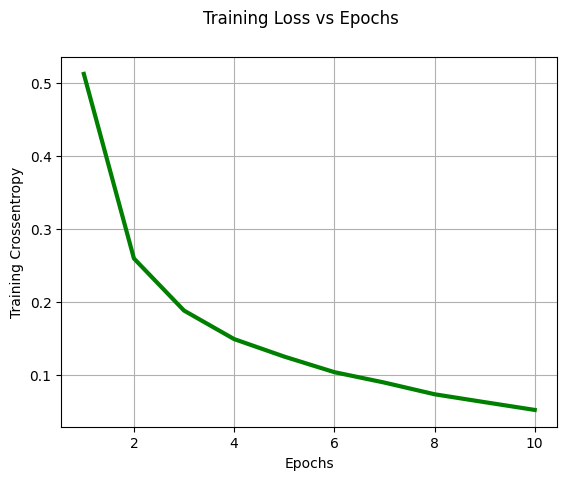

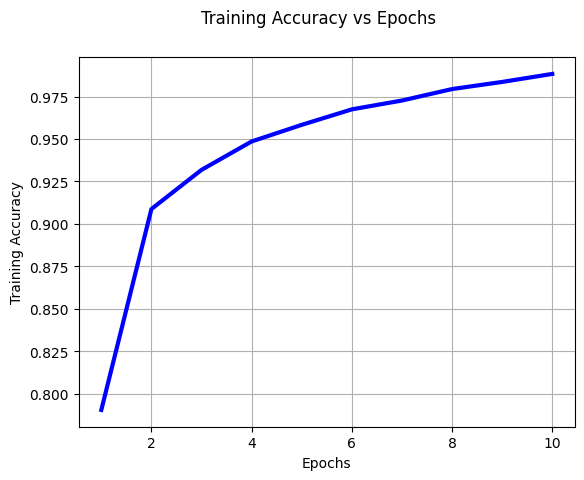

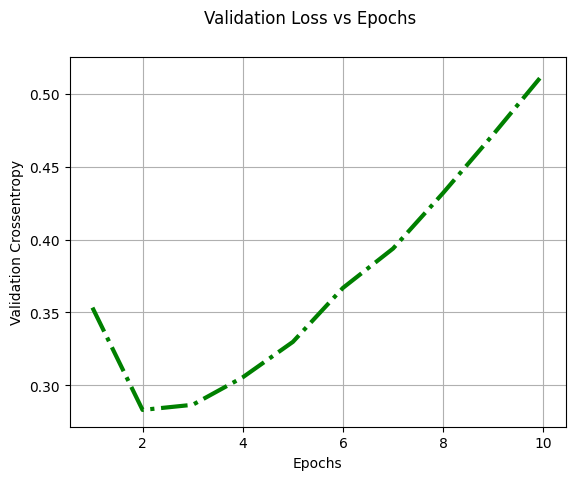

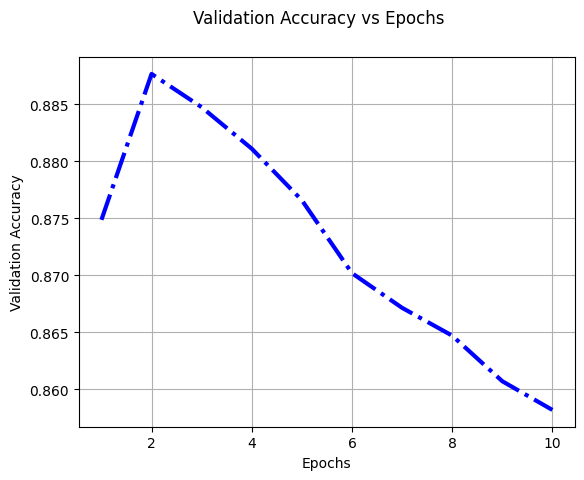

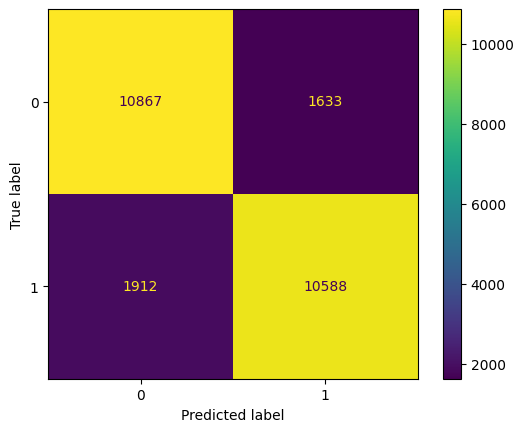

In [2]:
from keras.datasets import imdb
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


(Xtrain, ytrain), (Xtest, ytest) = imdb.load_data(num_words=10000)


def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        results[i, sequences[i]] = 1.0
    return results

Xtrain = vectorize(Xtrain)

model = Sequential()
model.add(Dense(16, input_dim=10000, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(Xtrain, ytrain, epochs=10, batch_size=550, verbose=1, validation_data=(vectorize(Xtest), ytest))

Xtest = vectorize(Xtest)
ypred = model.predict(Xtest)
ypred = np.round(ypred)
score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')


cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')


plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()
